In [330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [331]:
data = pd.read_json('data_export.json')
print(data.head())

                      apple  apricot   bacon   basil  blackberry  blueberry  \
Altbier              0.7037   0.5938  0.3448  0.3077      0.5714     0.5000   
Amber Kellerbier     0.4000   0.4815  0.2368  0.2941      0.4286     0.6087   
American Amber Ale   0.5313   0.5455  0.4103  0.2727      0.6667     0.5250   
American Barleywine  0.4857   0.6364  0.4103  0.2778      0.7500     0.5714   
American Brown Ale   0.6190   0.6061  0.4000  0.4000      0.5000     0.4286   

                     bourbon  cardamom    chai  chamomile  ...    port  \
Altbier               0.6286    0.2857  0.4839     0.4865  ...  0.3333   
Amber Kellerbier      0.5000    0.3448  0.5833     0.4000  ...  0.5833   
American Amber Ale    0.6512    0.4419  0.7059     0.4872  ...  0.6364   
American Barleywine   0.6552    0.4643  0.5161     0.4074  ...  0.6667   
American Brown Ale    0.7000    0.4815  0.5333     0.5200  ...  0.8889   

                     pumpkin  raspberry  red wine  rose hips     rye   smoke  \


In [332]:

flavors = list(data.columns)
avg_flavor_rating = (list(data.mean()))
flavor_stdev = (list(data.std()))
zippedList =  list(zip(flavors, avg_flavor_rating, flavor_stdev))
new_df = pd.DataFrame(zippedList, columns = ['Flavors', 'Average Rating', 'STDev Rating'])
print(new_df.head())

      Flavors  Average Rating  STDev Rating
0       apple        0.480396      0.099379
1     apricot        0.540247      0.112581
2       bacon        0.380108      0.093559
3       basil        0.385725      0.135283
4  blackberry        0.596599      0.102808


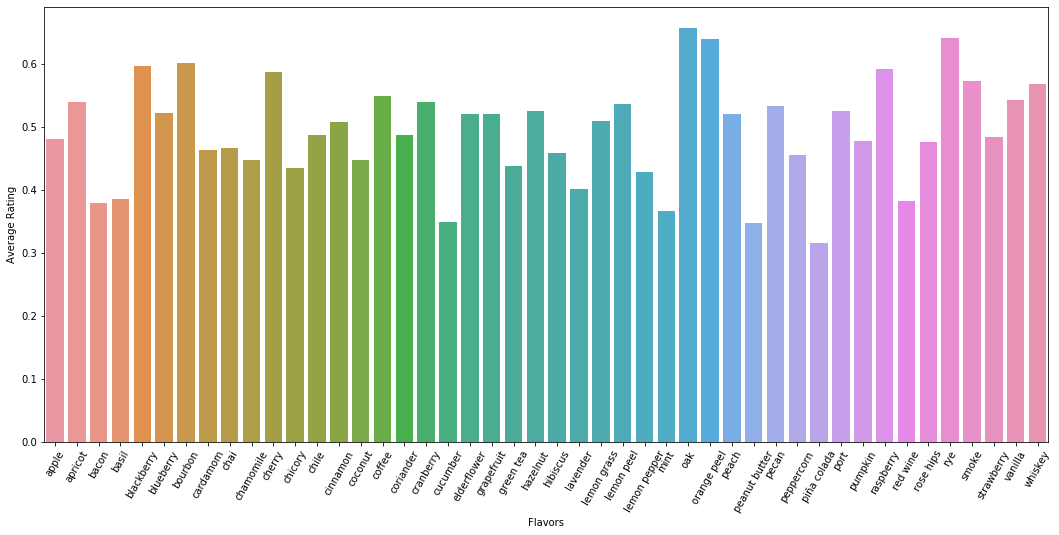

In [333]:
plt.figure(figsize = (18, 8))

ax = sns.barplot(x = new_df['Flavors'], y = new_df['Average Rating'])
# ax = sns.barplot(x = new_df['Flavors'], y = new_df['Average Rating'], yerr = new_df['STDev Rating'], ci = 'sd')
# ^^ alternate with stdev bars
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.show()


In [334]:
print(flavors)

['apple', 'apricot', 'bacon', 'basil', 'blackberry', 'blueberry', 'bourbon', 'cardamom', 'chai', 'chamomile', 'cherry', 'chicory', 'chile', 'cinnamon', 'coconut', 'coffee', 'coriander', 'cranberry', 'cucumber', 'elderflower', 'grapefruit', 'green tea', 'hazelnut', 'hibiscus', 'lavender', 'lemon grass', 'lemon peel', 'lemon pepper', 'mint', 'oak', 'orange peel', 'peach', 'peanut butter', 'pecan', 'peppercorn', 'piña colada', 'port', 'pumpkin', 'raspberry', 'red wine', 'rose hips', 'rye', 'smoke', 'strawberry', 'vanilla', 'whiskey']


In [335]:
fruits = ['apple', 'apricot', 'blackberry', 'blueberry', 'cherry', 'coconut', 'cranberry', 'cucumber', 'grapefruit', 
         'lemon peel', 'orange peel', 'peach', 'pumpkin', 'raspberry', 'strawberry']
florals = ['chamomile', 'elderflower', 'hibiscus', 'lavender', 'rose hips']
herbs = ['basil', 'chicory', 'lemon grass', 'mint']
spices = ['cardamom', 'chai', 'chile', 'cinnamon', 'coriander', 'lemon pepper', 'peppercorn', 'vanilla']
alcohols = ['bourbon', 'piña colada', 'port', 'red wine', 'whiskey']
nuts = ['hazelnut', 'pecan']
other = ['bacon', 'coffee', 'green tea', 'oak', 'peanut butter', 'rye', 'smoke']


In [336]:
grouping = []
for each in flavors:
    if each in fruits:
        grouping.append('fruit')
    elif each in spices:
        grouping.append('spice')
    elif each in other:
        grouping.append('other')
    elif each in florals:
        grouping.append('floral')
    elif each in alcohols:
        grouping.append('alcohol')
    elif each in herbs:
        grouping.append('herb')
    elif each in nuts:
        grouping.append('nut')
    else:
        grouping.append('Na')

In [337]:
print(grouping)
#grouping = np.array(grouping)
new_df['Grouping'] = grouping
print(new_df.head())

['fruit', 'fruit', 'other', 'herb', 'fruit', 'fruit', 'alcohol', 'spice', 'spice', 'floral', 'fruit', 'herb', 'spice', 'spice', 'fruit', 'other', 'spice', 'fruit', 'fruit', 'floral', 'fruit', 'other', 'nut', 'floral', 'floral', 'herb', 'fruit', 'spice', 'herb', 'other', 'fruit', 'fruit', 'other', 'nut', 'spice', 'alcohol', 'alcohol', 'fruit', 'fruit', 'alcohol', 'floral', 'other', 'other', 'fruit', 'spice', 'alcohol']
      Flavors  Average Rating  STDev Rating Grouping
0       apple        0.480396      0.099379    fruit
1     apricot        0.540247      0.112581    fruit
2       bacon        0.380108      0.093559    other
3       basil        0.385725      0.135283     herb
4  blackberry        0.596599      0.102808    fruit


In [338]:
new_df = new_df.sort_values(['Grouping', 'Average Rating'])


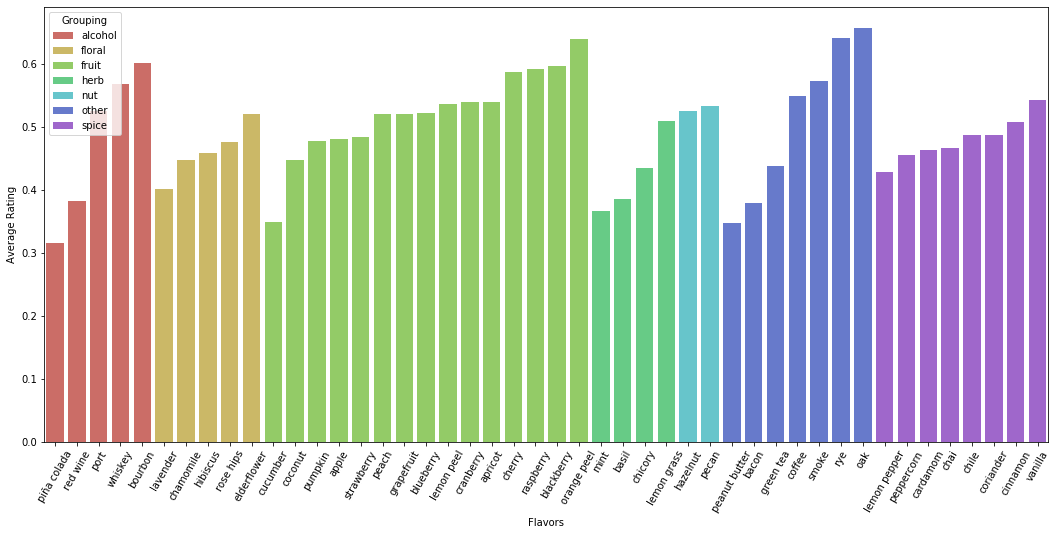

In [339]:
plt.figure(figsize = (18, 8))
pal = sns.color_palette('hls', 8)
ax = sns.barplot(x = new_df['Flavors'], y = new_df['Average Rating'], palette = pal, hue = new_df['Grouping'], dodge = False)

#ax = sns.barplot(x = new_df['Flavors'], y = new_df['Average Rating'], hue = new_df['Grouping'],
#yerr = new_df['STDev Rating'], dodge = False, ci = 'sd')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.show()

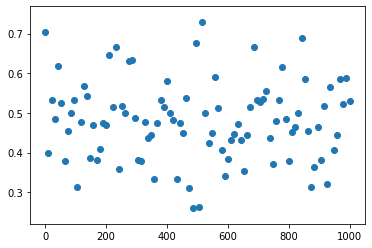

In [340]:
import numpy as np
plt.scatter(np.linspace(0,1000,len(data.index)), data['apple'])

In [341]:
from scipy import stats
for each in flavors:
    k2, p = stats.normaltest(data[each])
    #print(p)

In [342]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

a1 = [[.1, .8, 7]]
a2 = [[.3, .6, 8]]
a3 = [[-.1, -.8, -7]]
a4 = [[0,0,0]]
a5 = [[1,0,1]]
cos = cosine_similarity(a5, a5)
euclid = np.linalg.norm(np.subtract(a5, a5))
print('cosine similarity = ' + str(cos), 'euclidean dist = ' + str(euclid))

cos = cosine_similarity(a1, a3)
euclid = np.linalg.norm(np.subtract(a1, a3))
print('cosine similarity = ' + str(cos), 'euclidean dist = ' + str(euclid))



cosine similarity = [[1.]] euclidean dist = 0.0
cosine similarity = [[-1.]] euclidean dist = 14.092551223962253


In [343]:
import pandas as pd
similarity_df = pd.DataFrame(columns = flavors)
similarity_df.insert(loc = 0, column='Flavors', value = flavors)
print(similarity_df.head())
#similarity_df['Flavors'] = flavors
#print(similarity_df)
#test = range(46)
#similarity_df['apple'] = test
#print(similarity_df)

      Flavors apple apricot bacon basil blackberry blueberry bourbon cardamom  \
0       apple   NaN     NaN   NaN   NaN        NaN       NaN     NaN      NaN   
1     apricot   NaN     NaN   NaN   NaN        NaN       NaN     NaN      NaN   
2       bacon   NaN     NaN   NaN   NaN        NaN       NaN     NaN      NaN   
3       basil   NaN     NaN   NaN   NaN        NaN       NaN     NaN      NaN   
4  blackberry   NaN     NaN   NaN   NaN        NaN       NaN     NaN      NaN   

  chai  ... port pumpkin raspberry red wine rose hips  rye smoke strawberry  \
0  NaN  ...  NaN     NaN       NaN      NaN       NaN  NaN   NaN        NaN   
1  NaN  ...  NaN     NaN       NaN      NaN       NaN  NaN   NaN        NaN   
2  NaN  ...  NaN     NaN       NaN      NaN       NaN  NaN   NaN        NaN   
3  NaN  ...  NaN     NaN       NaN      NaN       NaN  NaN   NaN        NaN   
4  NaN  ...  NaN     NaN       NaN      NaN       NaN  NaN   NaN        NaN   

  vanilla whiskey  
0     NaN     NaN 

In [385]:
def make_similarity_matrix(df, variables):
    
    similarity_vec_overall = []
    used = []
    for var1 in variables:
        similarity_vec_part = []
        for var2 in variables:
            if var2 in used:
                similarity_vec_part.append(np.nan)
            else:
                euclid = np.linalg.norm(np.subtract(df[var1].values.reshape(-1, 1), df[var2].values.reshape(-1, 1)))
                similarity_vec_part.append(euclid)
        
        similarity_vec_overall.append(similarity_vec_part)
        used.append(var1)
    return  similarity_vec_overall


In [386]:
sim = make_similarity_matrix(data, flavors)
print(sim[0:5])


[[0.0, 1.34217791294597, 1.7926093216314591, 1.7590601240435189, 1.7081106433717927, 1.1349142698900214, 2.08813212465112, 1.3256275532742974, 1.4210442005792785, 1.1530326014471577, 1.5716662241073962, 1.5407489477523584, 2.1956371854202144, 1.6697931728211133, 1.6260371059726775, 2.090290867319666, 1.2883663027260532, 1.267786902440627, 1.9036754345213367, 1.2428439403239653, 1.3931979507593313, 1.3633399172620158, 1.7693086785521628, 1.3417126257138674, 1.6140329643473827, 1.3313029707771256, 1.3294469489227467, 1.3455994240486282, 1.7514387228789936, 2.324366853575399, 2.0091471747983025, 1.314762488056303, 2.1817213754281273, 1.7446084689694705, 1.3789453723770206, 2.1433886698403537, 2.3557532977797147, 1.853687306424684, 1.589754106772491, 2.194591365152064, 1.1117313029684825, 2.2578155017627104, 2.1024979048741046, 1.2616503636110918, 2.1032845242619937, 2.0159596746959005], [nan, 0.0, 2.2394396598256447, 2.035618488322407, 1.3709545506689855, 1.1327601202372901, 1.90231535766

In [387]:
similarity = cosine_similarity(data['apple'].values.reshape(-1, 1), data['basil'].values.reshape(-1, 1))
print(similarity)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [388]:
from sklearn.preprocessing import minmax_scale

sim = minmax_scale(sim)
print(sim.max())
print(sim.min())
print(sim.shape)

nan
nan
(46, 46)


In [389]:
similarity_df = pd.DataFrame(sim)
similarity_df = similarity_df.transpose()

similarity_df.columns = flavors

print(similarity_df.head())
print(similarity_df['whiskey'])


      apple   apricot     bacon  basil  blackberry  blueberry  bourbon  \
0  0.000000       NaN       NaN    NaN         NaN        NaN      NaN   
1  1.000000  0.000000       NaN    NaN         NaN        NaN      NaN   
2  0.800472  1.000000  0.000000    NaN         NaN        NaN      NaN   
3  0.864140  1.000000  0.865426    0.0         NaN        NaN      NaN   
4  0.660704  0.530291  0.976549    1.0         0.0        NaN      NaN   

   cardamom  chai  chamomile  ...  port  pumpkin  raspberry  red wine  \
0       NaN   NaN        NaN  ...   NaN      NaN        NaN       NaN   
1       NaN   NaN        NaN  ...   NaN      NaN        NaN       NaN   
2       NaN   NaN        NaN  ...   NaN      NaN        NaN       NaN   
3       NaN   NaN        NaN  ...   NaN      NaN        NaN       NaN   
4       NaN   NaN        NaN  ...   NaN      NaN        NaN       NaN   

   rose hips  rye  smoke  strawberry  vanilla  whiskey  
0        NaN  NaN    NaN         NaN      NaN      NaN  
1 

In [392]:
from_flavor = []
to_flavor = []
for flavor1 in flavors:
    for flavor2 in flavors:
        from_flavor.append(flavor1)
        to_flavor.append(flavor2)

sim_vals = sim.flatten()
print(len(sim_vals))

sim_df = pd.DataFrame(zip(from_flavor, to_flavor, sim_vals), columns = ['From', "To", 'Similarity'])

sim_df = sim_df.dropna()
sim_df = sim_df[(sim_df != 0).all(1)]
print(sim_df[0:50])   
print(sim_df.shape)

2116
       From             To  Similarity
1     apple        apricot    1.000000
2     apple          bacon    0.800472
3     apple          basil    0.864140
4     apple     blackberry    0.660704
5     apple      blueberry    0.570781
6     apple        bourbon    0.712122
7     apple       cardamom    0.688863
8     apple           chai    0.756969
9     apple      chamomile    0.515314
10    apple         cherry    0.625608
11    apple        chicory    0.748206
12    apple          chile    0.847909
13    apple       cinnamon    0.723556
14    apple        coconut    0.758259
15    apple         coffee    0.761755
16    apple      coriander    0.601418
17    apple      cranberry    0.581971
18    apple       cucumber    0.588705
19    apple    elderflower    0.566202
20    apple     grapefruit    0.569338
21    apple      green tea    0.559840
22    apple       hazelnut    0.676628
23    apple       hibiscus    0.567260
24    apple       lavender    0.575077
25    apple    lemon

ValueError: edge_color must be a color or list of one color per edge

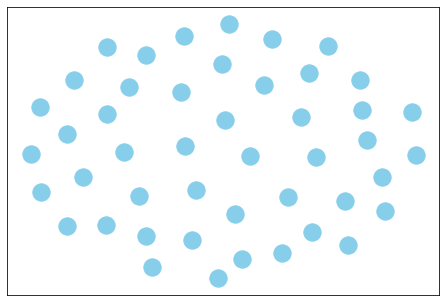

In [350]:
import networkx as nx
import matplotlib.pyplot as plt
 

# Build your graph
G = nx.from_pandas_edgelist(sim_df, 'From', 'To', create_using=nx.Graph())

#G['apple']['coffee']['Similarity']
# Custom the nodes:
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_color = sim_df['Similarity'], width = 10.0, edge_cmap = plt.cm.Blues)


In [ ]:
import random

G = nx.gnp_random_graph(30,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.Blues)
plt.savefig('edges.png')

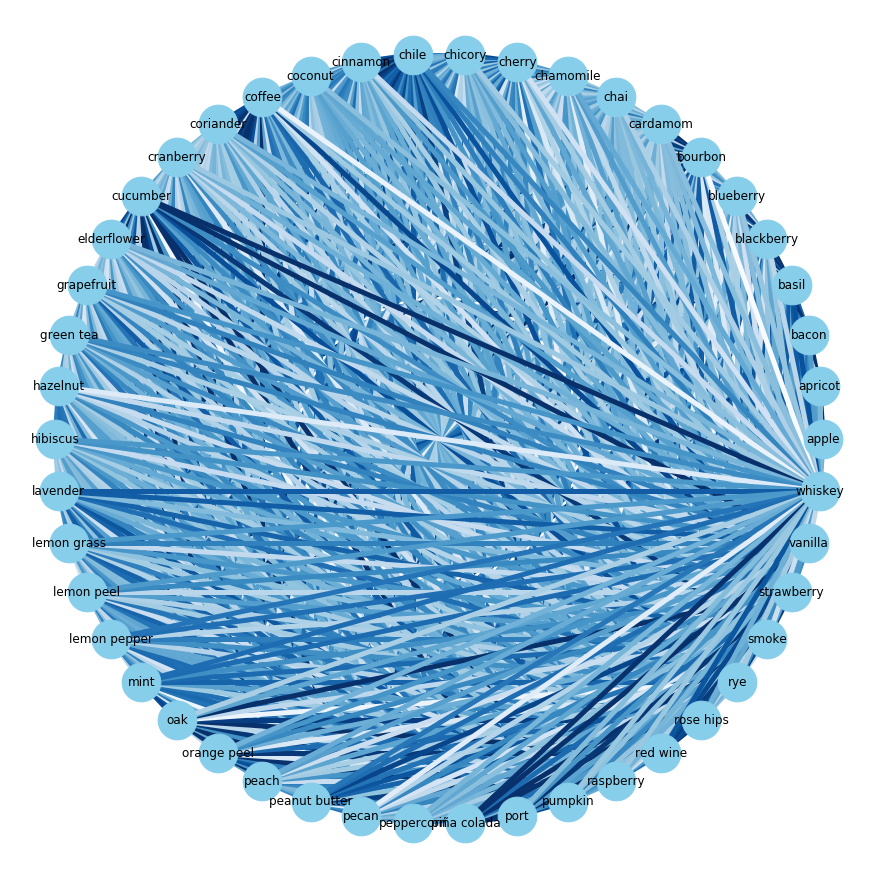

In [414]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

 
# Build your graph
G=nx.from_pandas_edgelist(sim_df, 'From', 'To', create_using=nx.Graph())
pos = nx.circular_layout(G)

# Custom the nodes:
plt.figure(1,figsize=(12,12)) 
nx.draw(G, pos = pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color=sim_df['Similarity'], width=5.0, edge_cmap=plt.cm.Blues)


In [ ]:
sim_df2 = sim_df[0:47]
#print(sim_df2)
cols = ['From','To']
#sim_df[cols] = sim_df[cols].apply(sorted, axis=1)
sim_df[cols] = np.sort(sim_df[cols].values, axis=1)
sim_df = sim_df.drop_duplicates()
print (sim_df)
#sim_df = sim_df.apply(sorted, axis=1).drop_duplicates()
G = nx.from_pandas_edgelist(sim_df2, 'From', 'To', create_using=nx.Graph())

#G['apple']['coffee']['Similarity']
# Custom the nodes:
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_color = sim_df2['Similarity'].values,
        width = 10.0, edge_cmap = plt.cm.Blues)


[0.         1.         0.80047226 0.86414038 0.66070401 0.57078135
 0.71212171 0.68886264 0.75696926 0.51531445 0.62560817 0.74820572
 0.84790874 0.72355565 0.75825935 0.76175508 0.60141797 0.58197123
 0.58870533 0.56620164 0.56933798 0.55984016 0.67662782 0.56725957
 0.57507663 0.54563223 0.55489132 0.52513121 0.63742998 0.65998884
 0.64848119 0.59236746 0.65306511 0.66228781 0.57442084 0.57475249
 0.73625803 0.78099707 0.53176761 0.65059768 0.4656463  0.61788477
 0.66391799 0.51101787 0.72029378 0.65609948        nan]


ValueError: edge_color must be a color or list of one color per edge

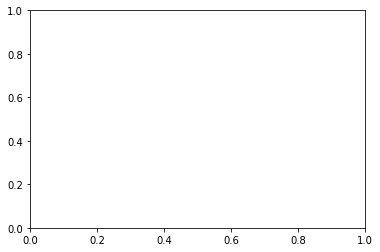

In [374]:
sim_df2 = sim_df[0:47]
print(sim_df2['Similarity'].values)
G = nx.from_pandas_edgelist(sim_df2, 'From', 'To', create_using=nx.Graph())

#G['apple']['coffee']['Similarity']
# Custom the nodes:
nx.draw_networkx_edges(G, pos = nx.spring_layout(G), edge_color = sim_df2['Similarity'].values,
        width = 10.0, edge_cmap = plt.cm.Blues)


In [ ]:
asdf = sim_df.drop_duplicates(subset = 'Similarity', keep = 'first')
print(asdf[0:50])

In [358]:
print(np.linalg.norm(np.subtract(data['basil'].values.reshape(-1, 1), data['apricot'].values.reshape(-1, 1))))
print(np.linalg.norm(np.subtract(data['apricot'].values.reshape(-1, 1), data['basil'].values.reshape(-1, 1))))
print(np.linalg.norm(np.subtract(data['apricot'].values.reshape(-1, 1), data['bacon'].values.reshape(-1, 1))))

2.035618488322407
2.035618488322407
2.2394396598256447
